# Obesity Prediction Project
### Scaling, Normalization, Ourlier Handling and Encoding has already been performed on this dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings = 'ignore'

In [2]:
df = pd.read_csv('estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.csv')

In [3]:
df.head(15)

,Height,Weight,family_history_with_overweight,SCC,MTRANS_Walking,FAVC_z,FCVC_minmax,NCP_z,CAEC_minmax,CH2O_minmax,FAF_minmax,TUE_z,CALC_z,Age_bin_minmax,NObeyesdad
0,1.62,64.0,1,0,0,2.766876,0.5,0.404704,0.333333,0.5,0.000000,0.550985,1.439033,0.25,1
1,1.52,56.0,1,1,0,2.766876,1.0,0.404704,0.333333,1.0,1.000000,1.092724,0.516552,0.25,1
2,1.80,77.0,1,0,0,2.766876,0.5,0.404704,0.333333,0.5,0.666667,0.550985,2.472136,0.50,1
3,1.80,87.0,0,0,1,2.766876,1.0,0.404704,0.333333,0.5,0.666667,1.092724,2.472136,0.75,2
4,1.78,89.8,0,0,0,2.766876,0.5,2.164116,0.333333,0.5,0.000000,1.092724,0.516552,0.50,3
5,1.62,53.0,0,0,0,0.361418,0.5,0.404704,0.333333,0.5,0.000000,1.092724,0.516552,1.00,1
6,1.50,55.0,1,0,0,0.361418,1.0,0.404704,0.333333,0.5,0.333333,1.092724,0.516552,0.50,1
7,1.64,53.0,0,0,0,2.766876,0.5,0.404704,0.333333,0.5,1.000000,1.092724,0.516552,0.50,1
8,1.78,64.0,1,0,0,0.361418,1.0,0.404704,0.333333,0.5,0.333333,0.550985,2.472136,0.75,1
9,1.72,68.0,1,0,0,0.361418,0.5,0.404704,0.333333,0.5,0.333333,0.550985,1.439033,0.50,1


## Exploratory Data Analysis:

In [4]:
df.shape

(2086, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Height                          2086 non-null   float64
 1   Weight                          2086 non-null   float64
 2   family_history_with_overweight  2086 non-null   int64  
 3   SCC                             2086 non-null   int64  
 4   MTRANS_Walking                  2086 non-null   int64  
 5   FAVC_z                          2086 non-null   float64
 6   FCVC_minmax                     2086 non-null   float64
 7   NCP_z                           2086 non-null   float64
 8   CAEC_minmax                     2086 non-null   float64
 9   CH2O_minmax                     2086 non-null   float64
 10  FAF_minmax                      2086 non-null   float64
 11  TUE_z                           2086 non-null   float64
 12  CALC_z                          20

In [6]:
df.isnull().sum()

Height                            0
Weight                            0
family_history_with_overweight    0
SCC                               0
MTRANS_Walking                    0
FAVC_z                            0
FCVC_minmax                       0
NCP_z                             0
CAEC_minmax                       0
CH2O_minmax                       0
FAF_minmax                        0
TUE_z                             0
CALC_z                            0
Age_bin_minmax                    0
NObeyesdad                        0
dtype: int64

In [7]:
df.duplicated().sum()

24

### Drop Duplicate Rows

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(2062, 15)

In [11]:
df.corr()

,Height,Weight,family_history_with_overweight,SCC,MTRANS_Walking,FAVC_z,FCVC_minmax,NCP_z,CAEC_minmax,CH2O_minmax,FAF_minmax,TUE_z,CALC_z,Age_bin_minmax,NObeyesdad
Height,1.000000,0.455936,0.236031,-0.139190,0.034451,-0.183698,-0.042344,-0.176051,-0.060763,0.224662,0.291434,-0.074085,-0.079016,0.030154,0.125720
Weight,0.455936,1.000000,0.496517,-0.205094,-0.101944,-0.275895,0.216667,-0.308315,-0.305414,0.206678,-0.059405,-0.272049,-0.240035,0.334340,0.914053
family_history_with_overweight,0.236031,0.496517,1.000000,-0.199098,-0.068292,-0.219885,0.034810,-0.143232,-0.204958,0.168936,-0.063380,-0.066482,0.004148,0.273403,0.504967
SCC,-0.139190,-0.205094,-0.199098,1.000000,0.036955,0.182337,0.066928,0.014080,0.108342,0.001624,0.065972,0.120672,0.049740,-0.170521,-0.196179
MTRANS_Walking,0.034451,-0.101944,-0.068292,0.036955,1.000000,0.168305,0.012511,0.033255,0.080590,0.009398,0.107155,0.130330,0.056590,-0.078308,-0.138649
FAVC_z,-0.183698,-0.275895,-0.219885,0.182337,0.168305,1.000000,0.024412,0.032891,0.149797,-0.010863,0.107793,0.072319,0.129411,-0.096658,-0.250080
FCVC_minmax,-0.042344,0.216667,0.034810,0.066928,0.012511,0.024412,1.000000,-0.070534,0.033772,0.081600,0.018055,-0.229588,-0.082948,0.053069,0.230723
NCP_z,-0.176051,-0.308315,-0.143232,0.014080,0.033255,0.032891,-0.070534,1.000000,0.087624,-0.072316,0.009974,0.141121,0.151824,-0.120669,-0.277511
CAEC_minmax,-0.060763,-0.305414,-0.204958,0.108342,0.080590,0.149797,0.033772,0.087624,1.000000,-0.114930,0.032867,0.114459,0.143812,-0.127614,-0.343644
CH2O_minmax,0.224662,0.206678,0.168936,0.001624,0.009398,-0.010863,0.081600,-0.072316,-0.114930,1.000000,0.162638,-0.015400,-0.026891,0.002628,0.135417


### Column 'NObeyesdad' is our target variable column. We will rename this column to 'Obesity_level'.

In [12]:
df.rename(columns={'NObeyesdad': 'Obesity_level'}, inplace= True)

In [13]:
df.head()

,Height,Weight,family_history_with_overweight,SCC,MTRANS_Walking,FAVC_z,FCVC_minmax,NCP_z,CAEC_minmax,CH2O_minmax,FAF_minmax,TUE_z,CALC_z,Age_bin_minmax,Obesity_level
0,1.62,64.0,1,0,0,2.766876,0.5,0.404704,0.333333,0.5,0.000000,0.550985,1.439033,0.25,1
1,1.52,56.0,1,1,0,2.766876,1.0,0.404704,0.333333,1.0,1.000000,1.092724,0.516552,0.25,1
2,1.80,77.0,1,0,0,2.766876,0.5,0.404704,0.333333,0.5,0.666667,0.550985,2.472136,0.50,1
3,1.80,87.0,0,0,1,2.766876,1.0,0.404704,0.333333,0.5,0.666667,1.092724,2.472136,0.75,2
4,1.78,89.8,0,0,0,2.766876,0.5,2.164116,0.333333,0.5,0.000000,1.092724,0.516552,0.50,3


### Visual distribution of the classes in our target variable

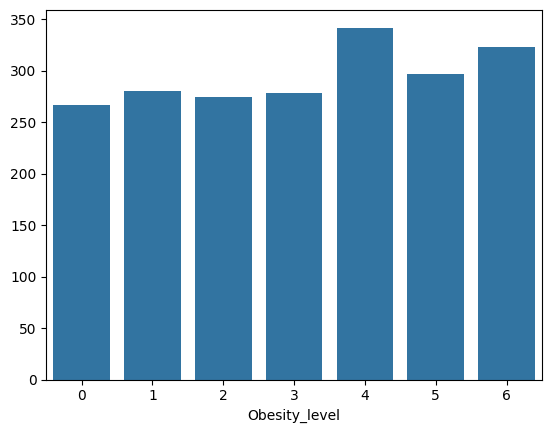

In [14]:
vals = df['Obesity_level'].value_counts()
sns.barplot(x=vals.index, y=vals.values)
plt.show()

## Feature Correlation & Reduction:

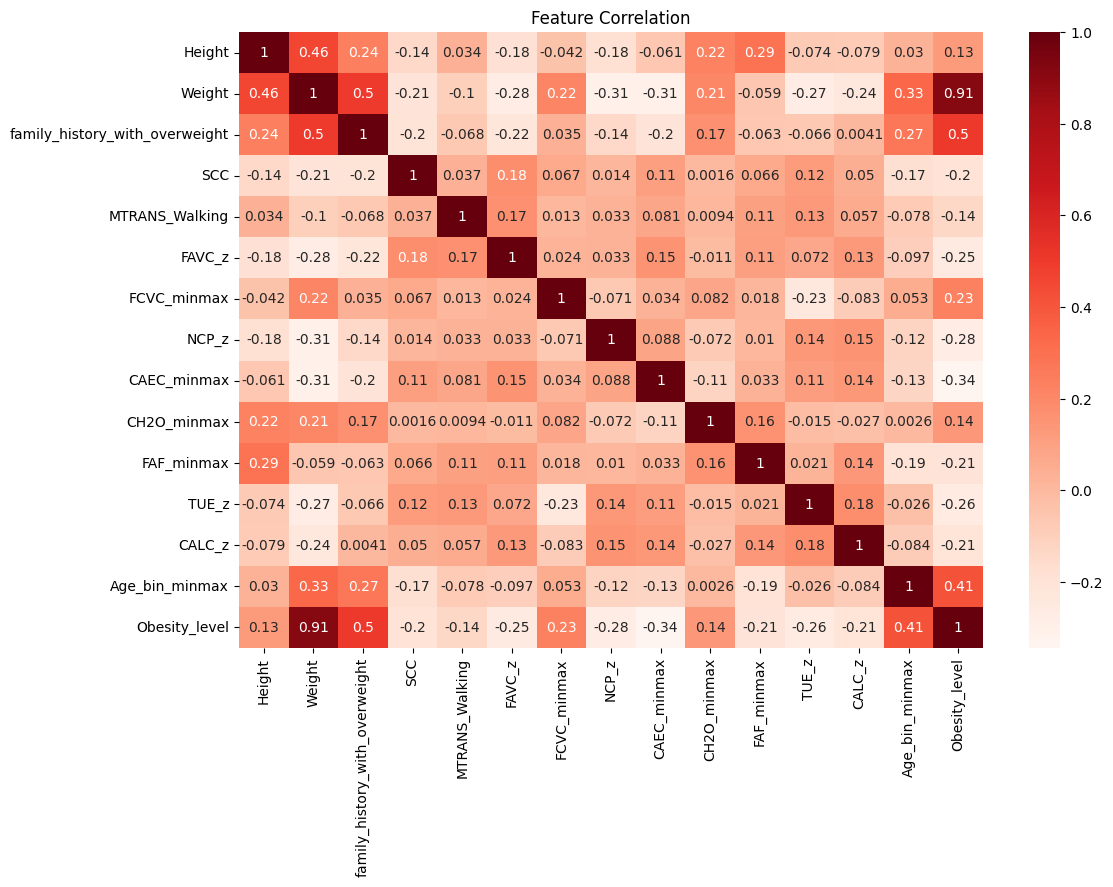

In [15]:
corr = df.corr()
plt.figure(figsize= (12,8))
sns.heatmap(corr, annot= True, cmap= 'Reds')
plt.title('Feature Correlation')
plt.show()

### From our correlation heatmap, we can see that the 'Weight' variable has a very strong correlation to our target variable as well has having a high multicollinearity with the 'height' and 'family_history_with_overweight' variables. We can drop the 'Weight' variable so that our model does not overfit when making predictions.

### We can also see that 'family_history_with_overweight' has a a strong correlation with our target variable so we can also drop this feature.

In [16]:
df = df.drop(['Weight', 'family_history_with_overweight'], axis=1)

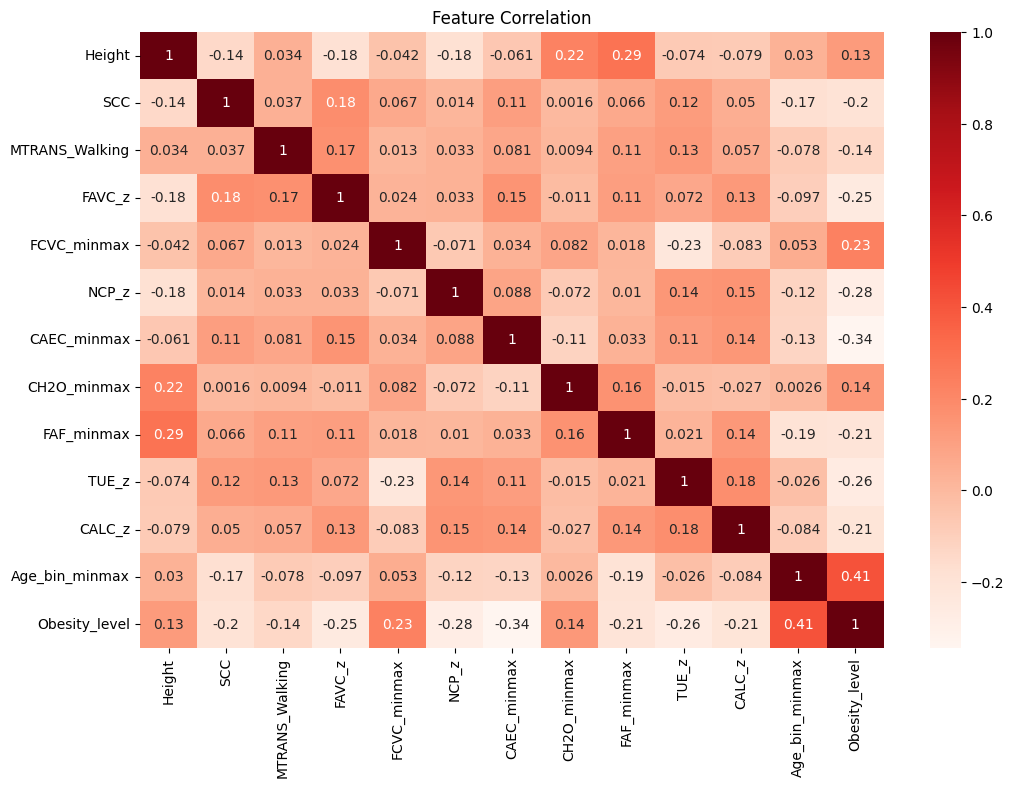

In [17]:
corr = df.corr()
plt.figure(figsize= (12,8))
sns.heatmap(corr, annot= True, cmap= 'Reds')
plt.title('Feature Correlation')
plt.show()

# Building Our Machine Learning Models:

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df.columns

Index(['Height', 'SCC', 'MTRANS_Walking', 'FAVC_z', 'FCVC_minmax', 'NCP_z',
       'CAEC_minmax', 'CH2O_minmax', 'FAF_minmax', 'TUE_z', 'CALC_z',
       'Age_bin_minmax', 'Obesity_level'],
      dtype='object')

In [22]:
X = df[['Height', 'SCC', 'MTRANS_Walking', 'FAVC_z', 'FCVC_minmax', 'NCP_z', 'CAEC_minmax', 'CH2O_minmax', 'FAF_minmax', 'TUE_z', 'CALC_z', 'Age_bin_minmax']]
y = df['Obesity_level']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Logistic Regression:

In [23]:
lr = LogisticRegression(max_iter= 500)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
classification = classification_report(y_pred, y_test)
accuracy1 = accuracy_score(y_pred, y_test)
print(classification)

              precision    recall  f1-score   support

           0       0.35      0.32      0.33        56
           1       0.20      0.29      0.24        41
           2       0.37      0.40      0.39        42
           3       0.17      0.45      0.25        20
           4       0.54      0.40      0.46        93
           5       0.66      0.55      0.60        69
           6       1.00      0.80      0.89        92

    accuracy                           0.50       413
   macro avg       0.47      0.46      0.45       413
weighted avg       0.57      0.50      0.52       413



## Random Forest Classifier:

In [24]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
classification = classification_report(y_pred, y_test)
accuracy2 = accuracy_score(y_pred, y_test)
print(classification)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        57
           1       0.79      0.66      0.72        73
           2       0.72      0.79      0.75        42
           3       0.66      0.80      0.72        44
           4       0.77      0.83      0.80        64
           5       0.88      0.89      0.89        57
           6       1.00      0.97      0.99        76

    accuracy                           0.82       413
   macro avg       0.81      0.82      0.81       413
weighted avg       0.83      0.82      0.82       413



## Decision Tree Classifier:

In [25]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
classification = classification_report(y_pred, y_test)
accuracy3 = accuracy_score(y_pred, y_test)
print(classification)

              precision    recall  f1-score   support

           0       0.77      0.78      0.78        51
           1       0.64      0.64      0.64        61
           2       0.59      0.56      0.57        48
           3       0.58      0.60      0.59        52
           4       0.65      0.68      0.67        66
           5       0.81      0.78      0.80        60
           6       0.97      0.96      0.97        75

    accuracy                           0.73       413
   macro avg       0.72      0.72      0.72       413
weighted avg       0.73      0.73      0.73       413



## Gradient Boosting Classifier:

In [26]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
classification = classification_report(y_pred, y_test)
accuracy4 = accuracy_score(y_pred, y_test)
print(classification)

              precision    recall  f1-score   support

           0       0.73      0.76      0.75        50
           1       0.69      0.63      0.66        67
           2       0.61      0.67      0.64        42
           3       0.68      0.68      0.68        53
           4       0.77      0.82      0.79        65
           5       0.88      0.88      0.88        58
           6       1.00      0.95      0.97        78

    accuracy                           0.78       413
   macro avg       0.76      0.77      0.77       413
weighted avg       0.78      0.78      0.78       413



## XGBoost Classifier:

In [27]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
classification = classification_report(y_pred, y_test)
accuracy5 = accuracy_score(y_pred, y_test)
print(classification)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        52
           1       0.74      0.62      0.68        72
           2       0.70      0.71      0.70        45
           3       0.70      0.79      0.74        47
           4       0.78      0.86      0.82        63
           5       0.90      0.90      0.90        58
           6       1.00      0.97      0.99        76

    accuracy                           0.82       413
   macro avg       0.81      0.82      0.81       413
weighted avg       0.82      0.82      0.82       413



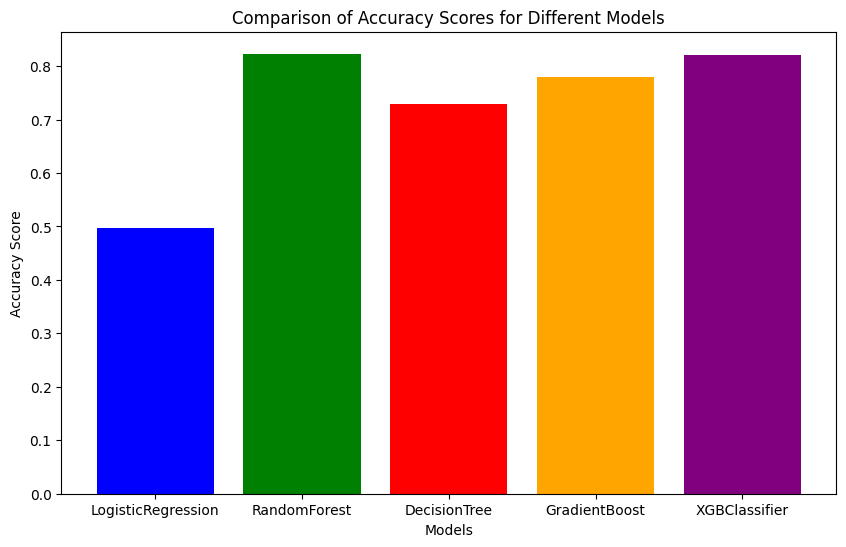

In [29]:
models = ['LogisticRegression', 'RandomForest', 'DecisionTree', 'GradientBoost', 'XGBClassifier']

# Accuracy scores corresponding to each model
acc = [accuracy1,accuracy2,accuracy3,accuracy4,accuracy5]

plt.figure(figsize=(10, 6))
plt.bar(models, acc, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy Scores for Different Models')
plt.show()

# Overall the Random Forest Classifier and XGBoost Classifier performed the best on the data in predicting the Obesity Level of an individual.